<span style='font-size:x-large'>Section Two: Developing the Random Walk Tools</span>

<span style='font-size:medium'><span style='font-family:courier new'>code needs to be documented.  Taken from </span></span>[https://towardsdatascience.com/random\-walks\-with\-python\-8420981bc4bc](https://towardsdatascience.com/random-walks-with-python-8420981bc4bc)



## [Return to Web site](https://acsg2.com)



In [3]:
%pylab inline
# Pylab is a module that provides a Matlab like namespace by importing functions from the modules Numpy and Matplotlib.
#                      %matplotlib inline turns on “inline plotting”, where plot graphics will appear in your notebook.
from itertools import cycle  # This module implements a number of iterator building blocks inspired by constructs from APL, Haskell, and SML.
#                           see <https://docs.python.org/3/library/itertools.html#itertools.cycle>
from mpl_toolkits.mplot3d import Axes3D  # see <https://matplotlib.org/stable/api/toolkits/mplot3d.html>
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')  # see cycle description above.
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Define parameters for the walk
dims = 1          # in this case the walk is either forward or backward
step_n = 10000    # There will be 10,000 steps
step_set = [-1, 0, 1] # create an array of one step forward or one step backward, or no step

origin = np.zeros((1,dims)) # create an array of zeros
print(origin.shape)

(1, 1)


In [5]:
# Simulate steps in 1D
step_shape = (step_n,dims)     # step-shape array created with dimensions of (10,000, 1)
print(type(step_shape))
steps = np.random.choice(a=step_set, size=step_shape) # a random sample is chosen from [step_set] and step_n *

path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

<class 'tuple'>


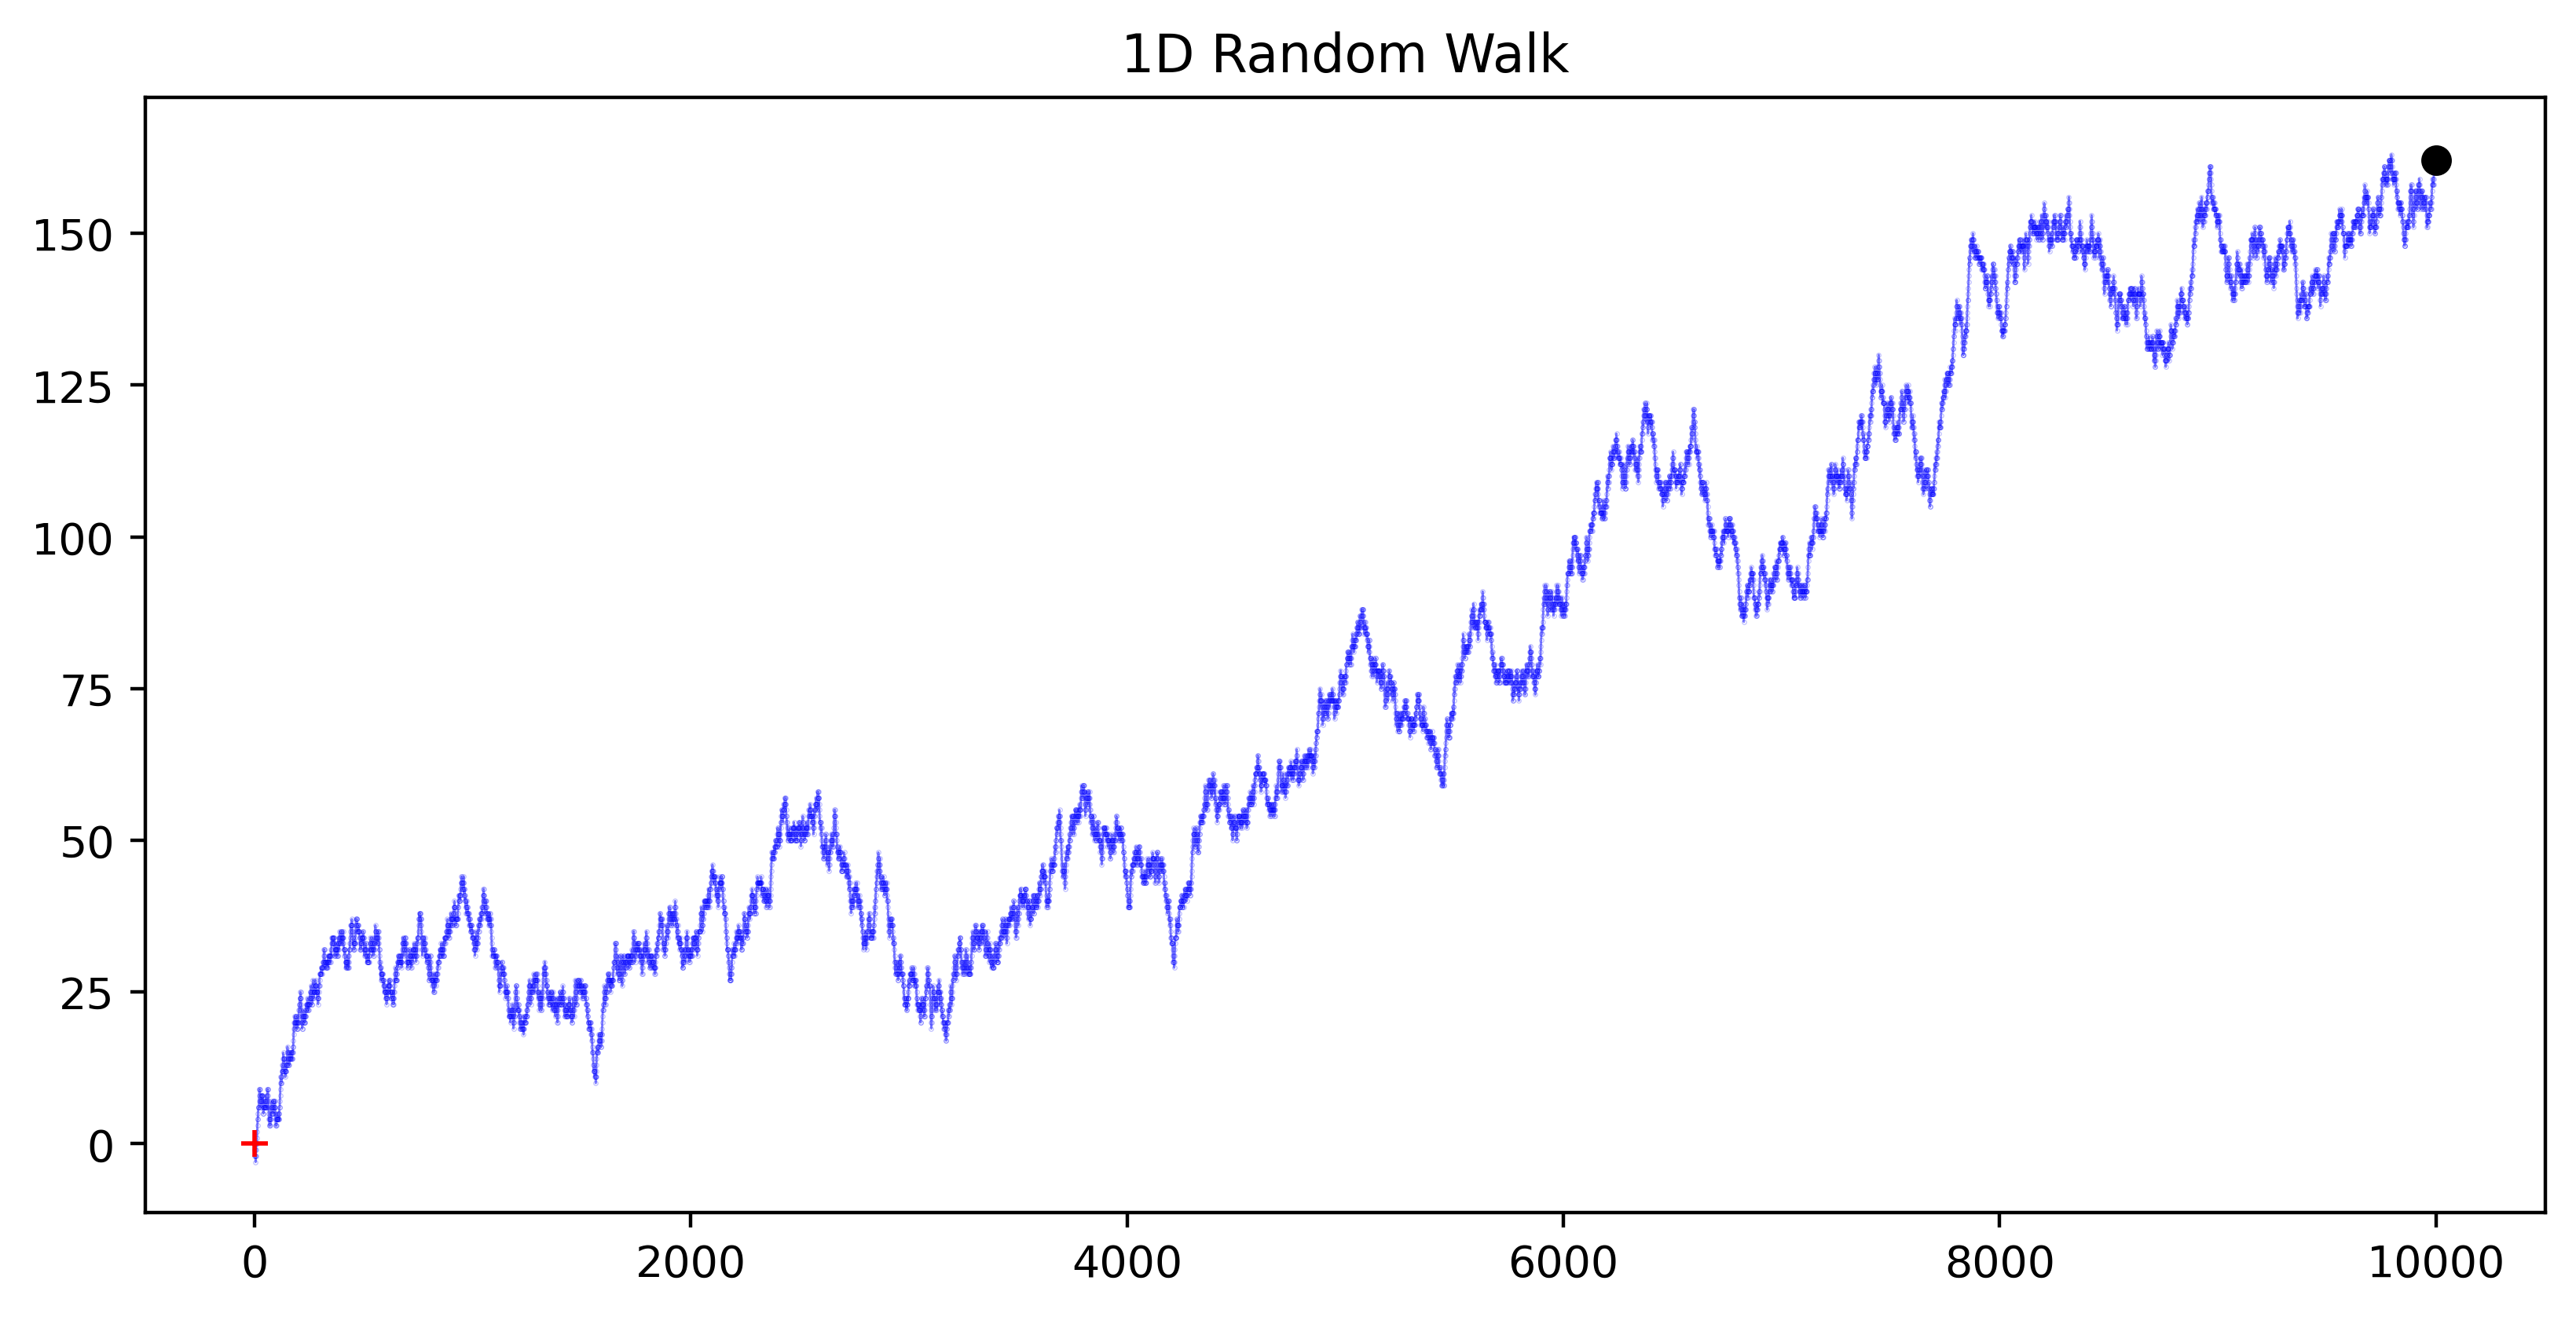

In [6]:
# Plot the path
fig = plt.figure(figsize=(8,4),dpi=200) # create the plot frame
ax = fig.add_subplot(111)               # create one subplot
ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05); # plot the scatter diagram of the path data and the array index
ax.plot(path,c='blue',alpha=0.5,lw=0.5,ls='-',); # plot the lines between the scatter points
ax.plot(0, start, c='red', marker='+')           # plot the start point
ax.plot(step_n, stop, c='black', marker='o')     # plot the stop point
plt.title('1D Random Walk')                     # label the plot
plt.tight_layout(pad=0)
#plt.savefig('plots/random_walk_1d.png',dpi=250);

In [7]:
# Define parameters for the walk for a two dimensional walk the same as the one dimensional
dims = 2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

In [8]:
# Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape) # calculate the next step
#print(steps)
path = np.concatenate([origin, steps]).cumsum(0)     # calculate the next position
#print(path)
start = path[:1]
stop = path[-1:]

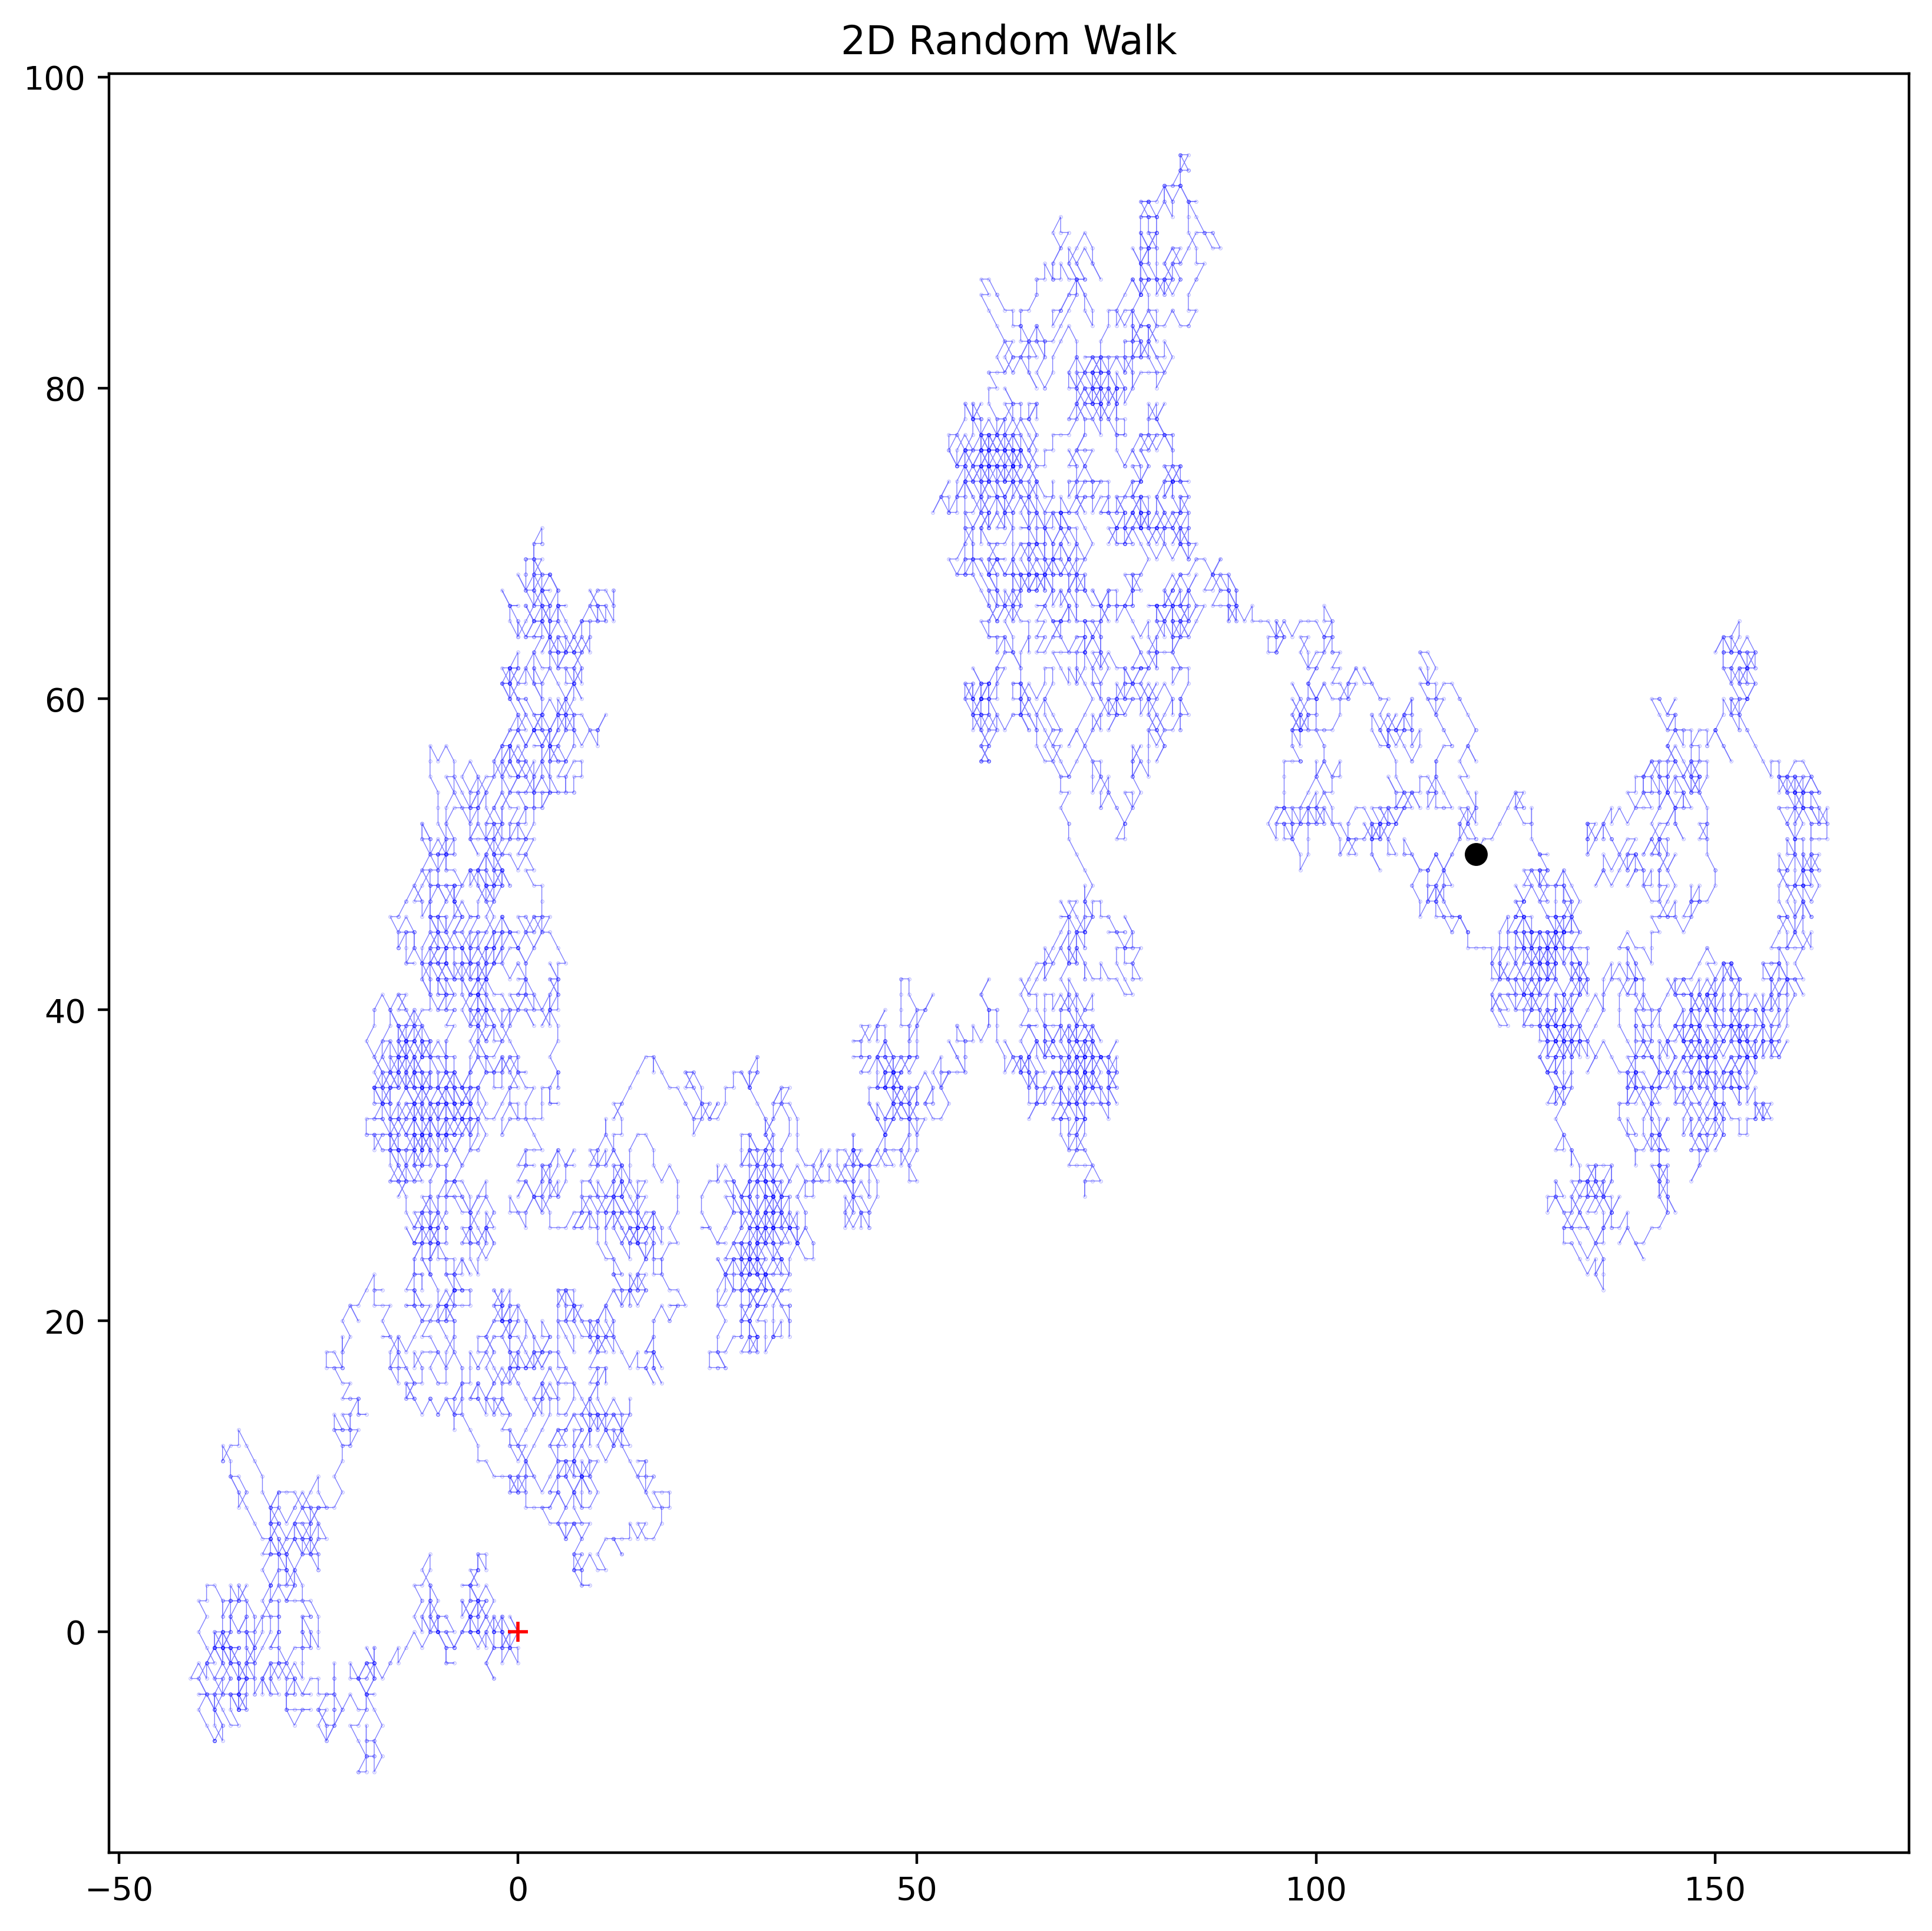

In [9]:
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);  # here the scatter diagram shows the two dimensional position.
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-'); # and here the dots are connected
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)
#plt.savefig(‘plots/random_walk_2d.png’,dpi=250);

In [10]:
# Define parameters for the walk in three dimenions
dims = 3
step_n = 1000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

In [11]:
# Simulate steps in 3D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

Text(0.5, 0.92, '3D Random Walk')

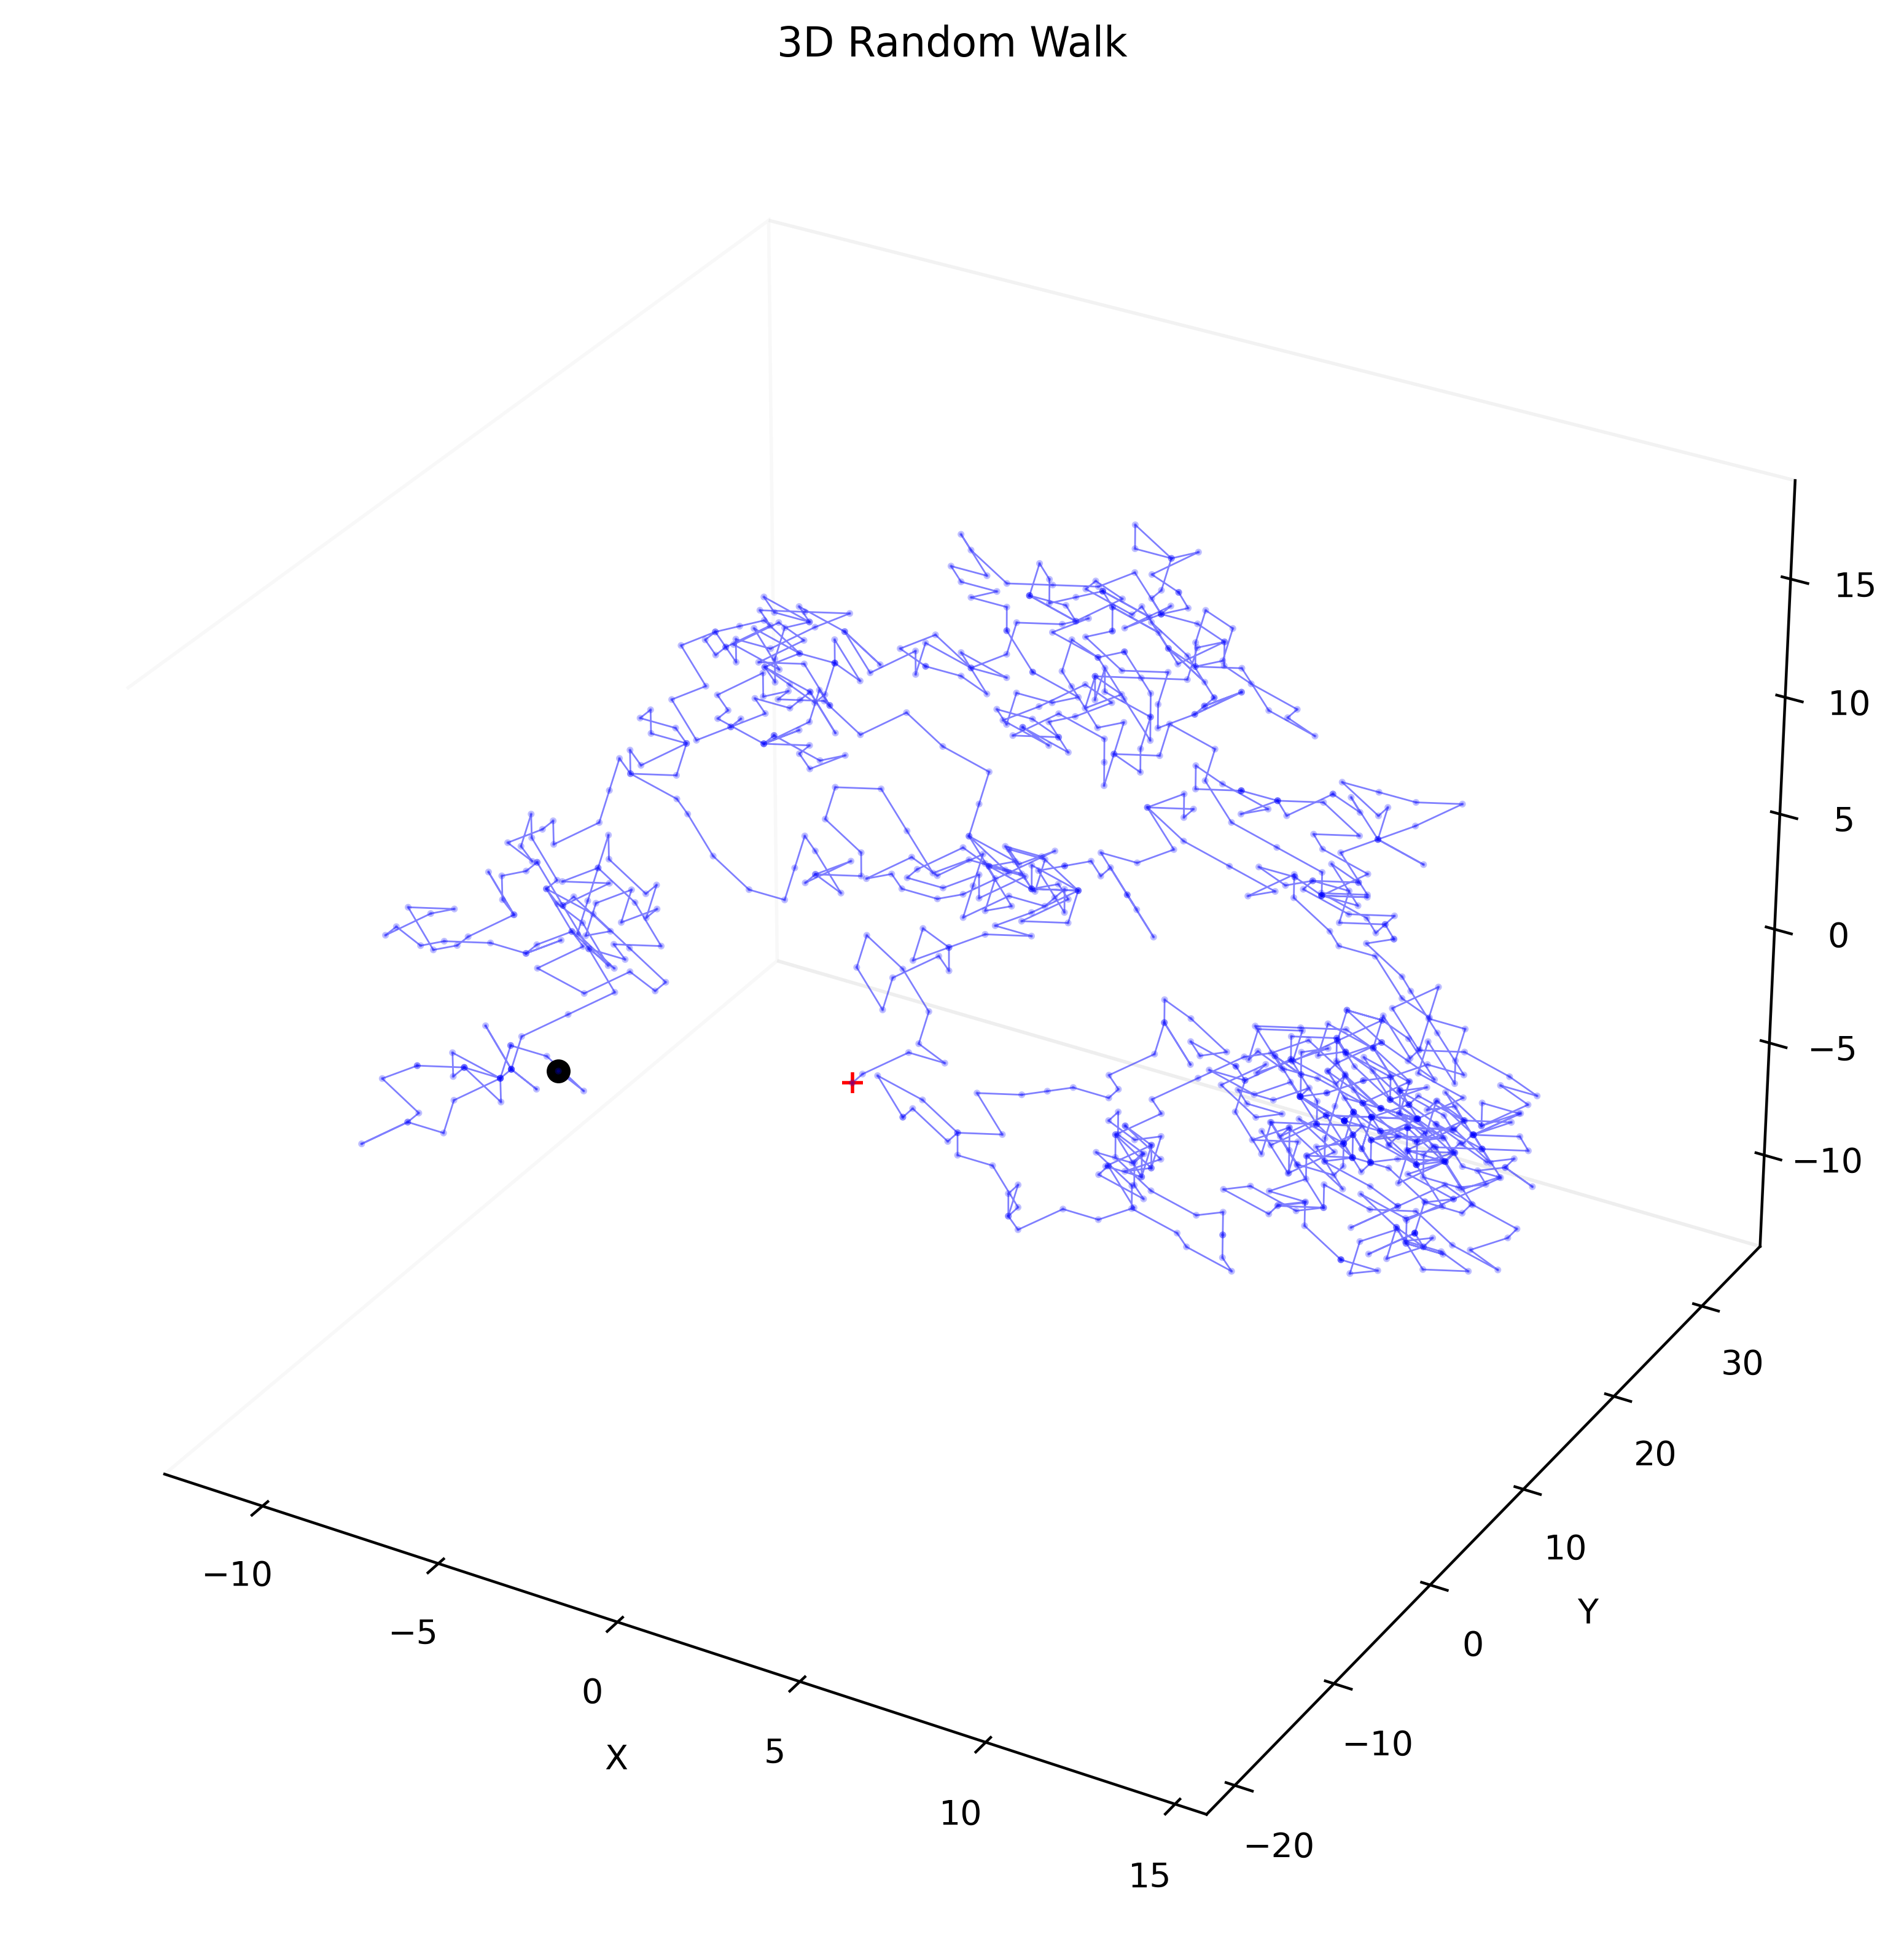

In [12]:
# Plot the path
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.5, lw=0.5)
ax.plot3D(start[:,0], start[:,1], start[:,2], c='red', marker='+')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], c='black', marker='o')
plt.title('3D Random Walk')
#plt.savefig(‘plots/random_walk_3d.png’,dpi=250);

In [13]:
# Define parameters for the walk for ten walks of 1000 steps in 3 dimensions
dims = 3
n_runs = 10
step_n = 1000
step_set = [-1, 0 ,1]
runs = np.arange(n_runs)
step_shape = (step_n,dims)

Text(0.5, 0.92, '3D Random Walk - Multiple runs')

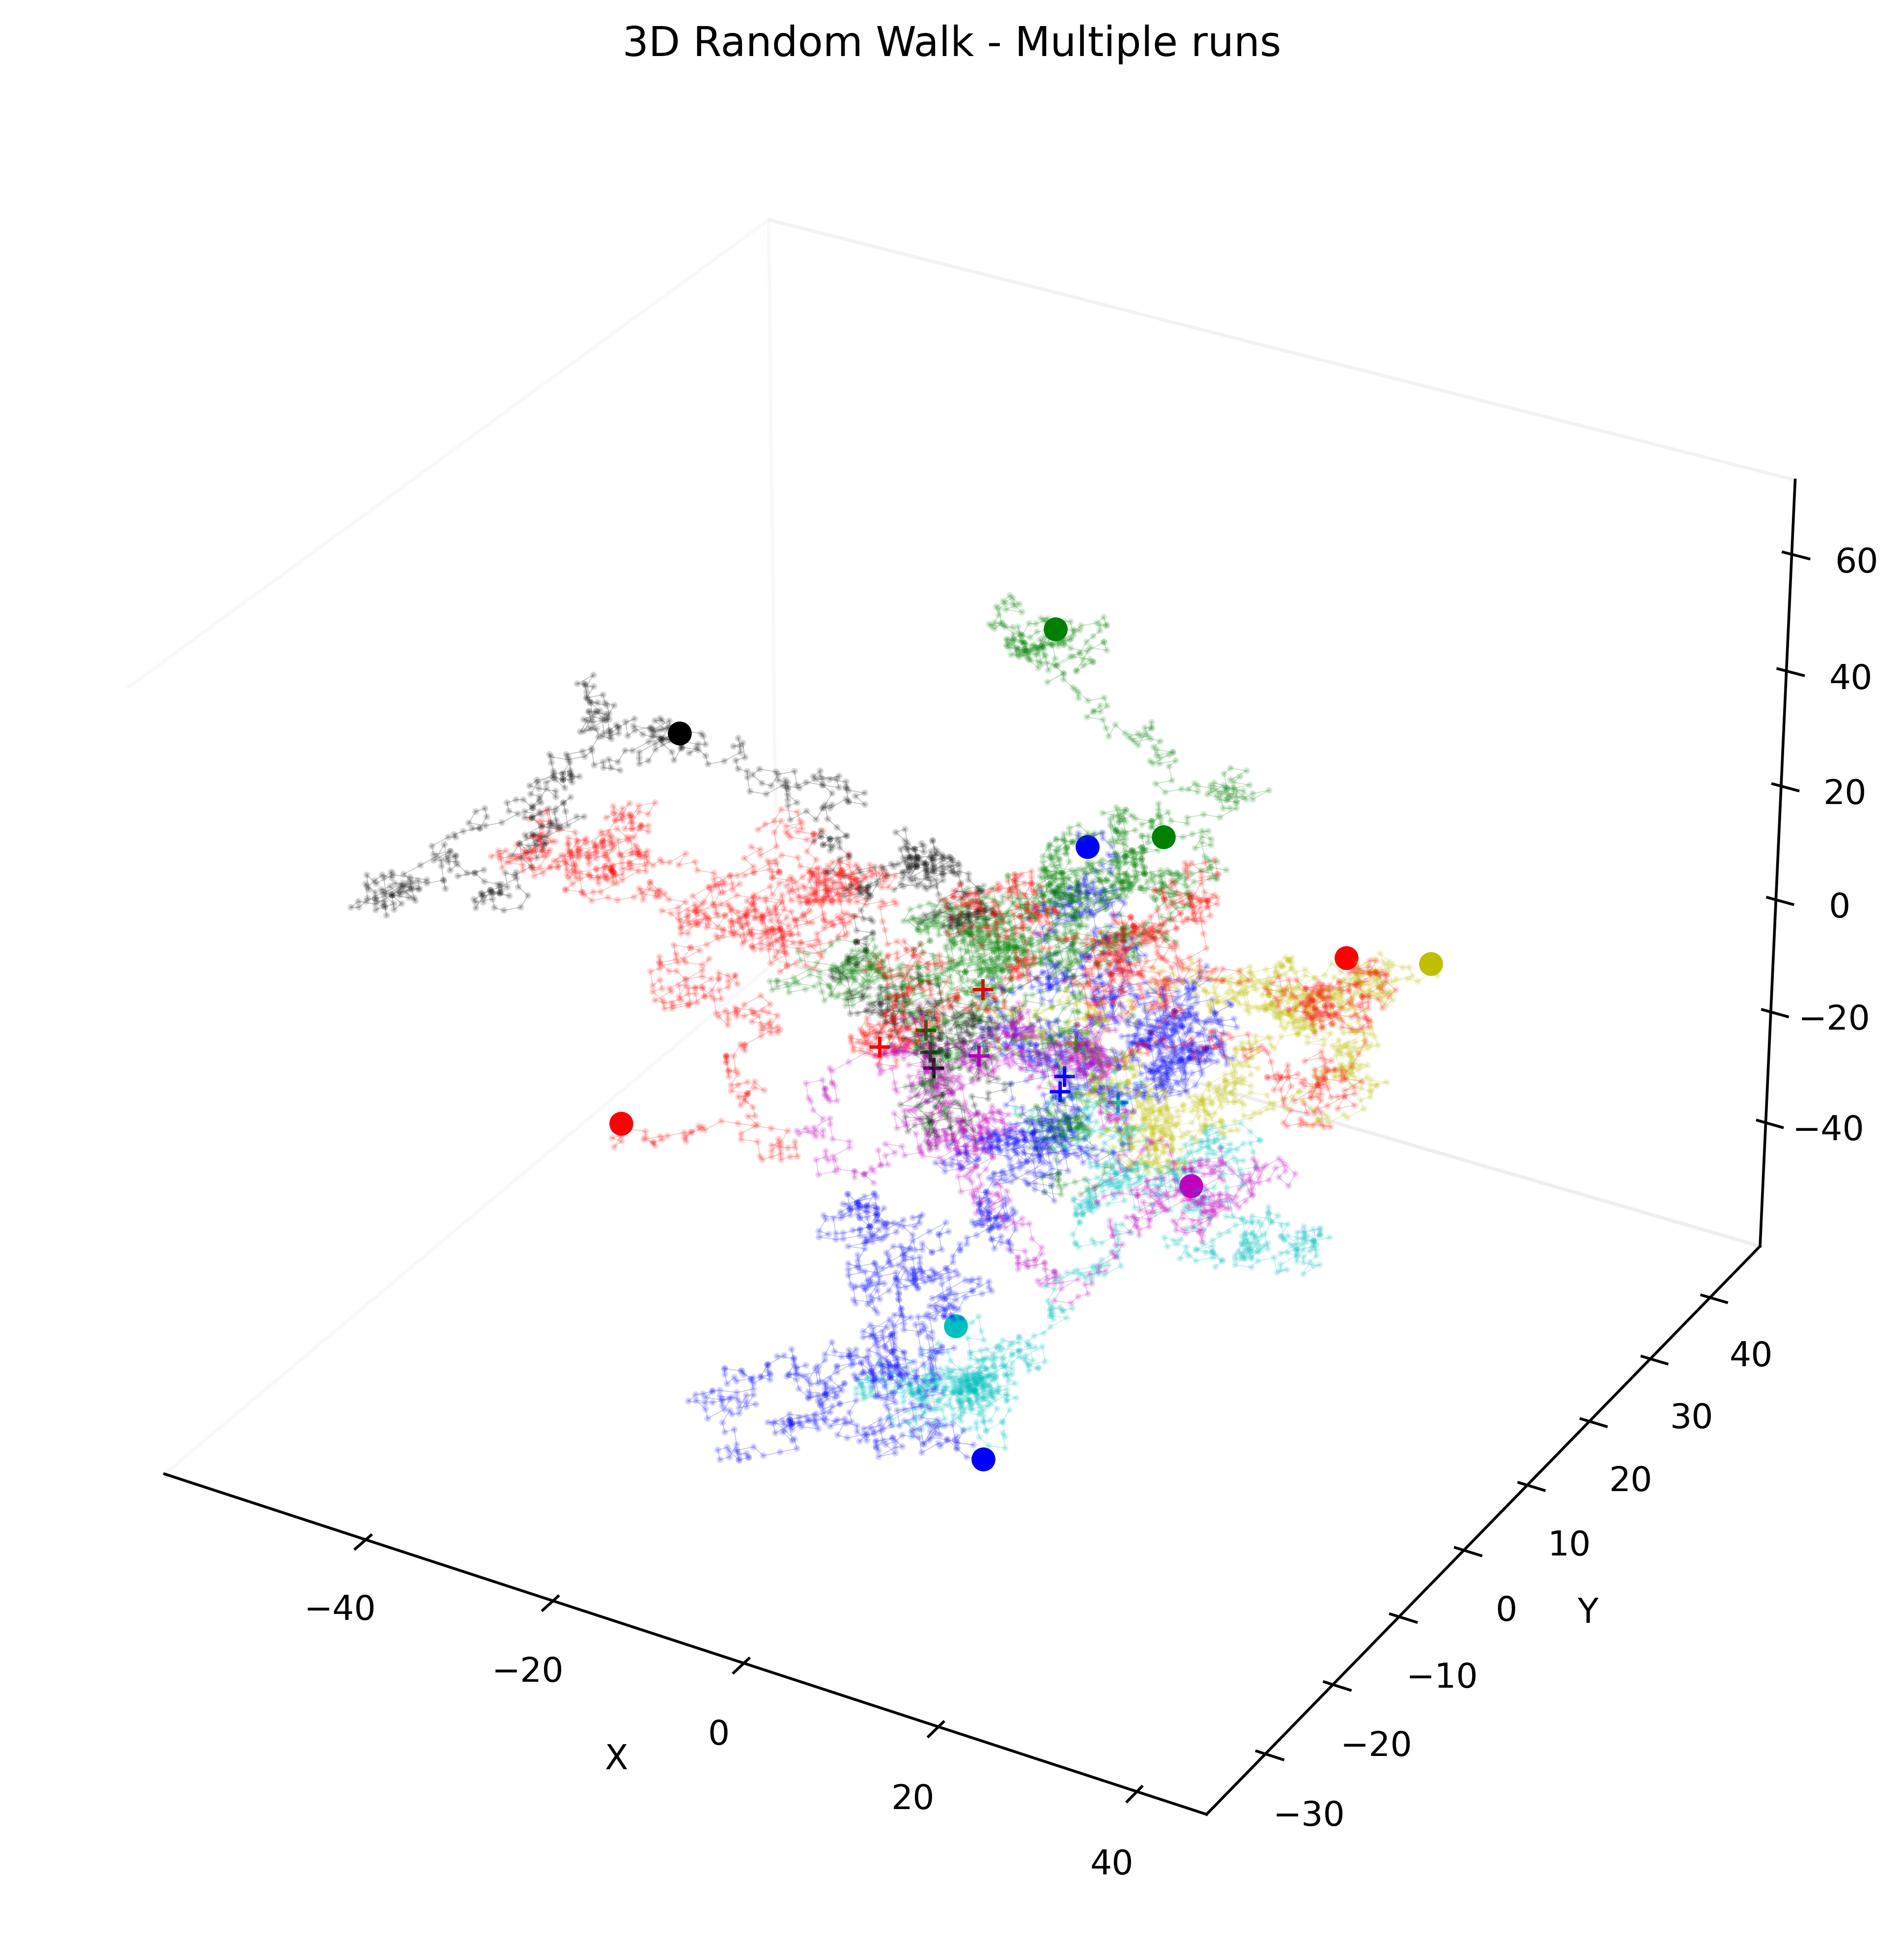

In [14]:
# Plot
fig = plt.figure(figsize=(10,10),dpi=250)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Y')

for i, col in zip(runs, colors):    
# Simulate steps in 3D
    origin = np.random.randint(low=-10,high=10,size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]    
# Plot the path
    ax.scatter3D(path[:,0], path[:,1], path[:,2],c=col,alpha=0.15,s=1);
    ax.plot3D(path[:,0], path[:,1], path[:,2], c=col, alpha=0.25,lw=0.25)
    ax.plot3D(start[:,0], start[:,1], start[:,2],c=col, marker='+')
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2],c=col, marker='o');

plt.title('3D Random Walk - Multiple runs')
#plt.savefig(‘plots/random_walk_3d_multiple_runs.png’,dpi=250);

## The value of the data created by random walks need to be explained here.

## The following code is experimental, ignore for now.

## Now for something different Networks



In [15]:
import networkx as nx             # networkx is old version here
import matplotlib.pyplot as plt

In [16]:
G = nx.Graph()                    # Init a graph in networkx

In [17]:
G.add_node(1)                     # add a single node
G.add_nodes_from([2,3,4,5])       # add multiple nodes

In [18]:
G.add_edge(1,2)                   # add edges
G.add_edges_from([(1,3), (2,4)])     # add multiple edges

In [19]:
print('Edges:', G.edges(), '# Edges:', G.number_of_edges())
print('Nodes:', G.nodes(), '# Nodes:', G.number_of_nodes())
pos = {1: (0, 0), 2: (10, 5), 3: (5,10), 4: (10, 10), 5: (7, 15)}

Edges: [(1, 2), (1, 3), (2, 4)] # Edges: 3
Nodes: [1, 2, 3, 4, 5] # Nodes: 5


In [20]:
fig = plt.figure(0)                  # Plot graph
kwds = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
fig.suptitle('Networkx Graph')
# nx.draw(G)
plt.show()

<Figure size 432x288 with 0 Axes>

[(1, 2), (1, 3), (1, 5), (2, 4), (2, 3), (5, 4)]
[1, 2, 3, 5, 4]


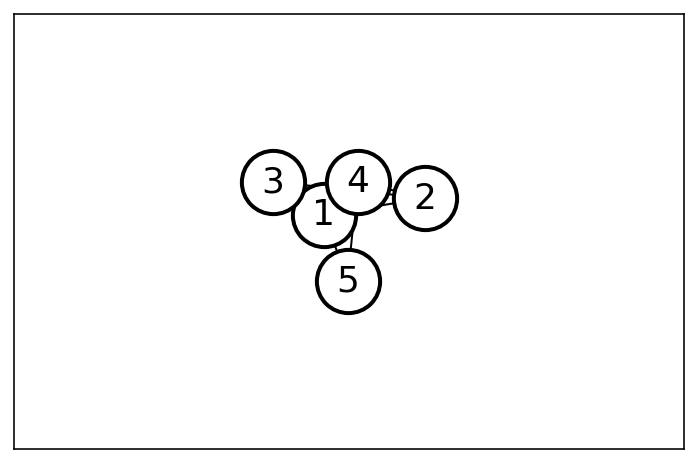

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

F = nx.Graph()
F.add_edge(1, 2)
F.add_edge(1, 3)
F.add_edge(1, 5)
F.add_edge(2, 4)
F.add_edge(3, 2)
F.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (30, 5), 3: (-15,10), 4: (10, 10), 5: (7, -20)}
print(F.edges())
print(F.nodes())
options = {
    "font_size": 18,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 1,
}
nx.draw_networkx(F, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(1.50)
plt.axis("on")
plt.show()

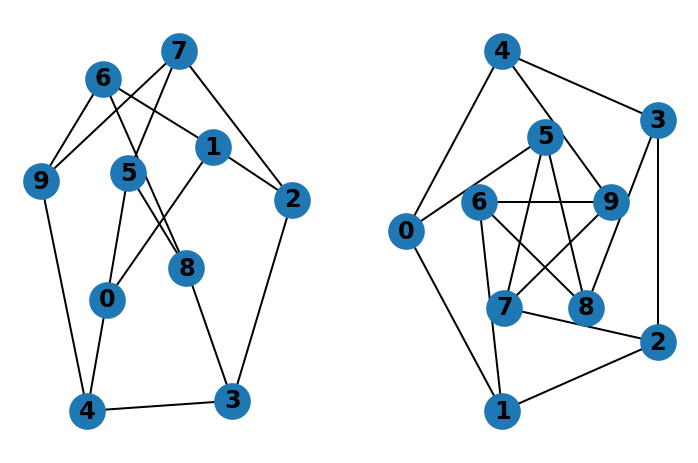

In [22]:

import matplotlib.pyplot as plt

import networkx as nx

G = nx.petersen_graph()

fig, (subax1, subax2) = plt.subplots(1, 2)

nx.draw(G, ax=subax1, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], ax=subax2, with_labels=True, font_weight='bold')



The display of networks is interesting. Now what can we learn about the development and analysis of these network views?



In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.petersen_graph()

fig, (subax1, subax2) = plt.subplots(1, 2)

nx.draw(G, ax=subax1, with_labels=True, font_weight='bold')

nx.draw_shell(G, nlist=[range(5, 10), range(5)], ax=subax2, with_labels=True, font_weight='bold')

plt.show()